# Principal Component Analysis

Principal component analysis, or PCA, is a statistical procedure that summarizes large datasets via smaller set of “summary indices” that can be more easily visualized and analyzed. PCA is widely used in pattern recognition and signal processing. Using PCA can help identify correlations between data points.

__Goals__:
* Extract the most important information from the data table
* Compress the size of the data set, dropping unimportant information
* Simplify the description of the data set
* Analyze the structure of the variables

In order to achieve these goals, PCA computes new variables called principal components which are obtained as linear combinations of the original variables. The $1^{st}$  principal component is required to have the largest possible variance (i.e., inertia and therefore this component will ‘explain’ or ‘extract’ the largest part of the inertia of the data table). The $2^{nd}$ component is computed under the constraint of being orthogonal to the first component and to have the largest possible inertia. The other components are computed likewise (see Appendix A for proof). The values of these new variables for the observations are called factor scores, and these factors scores can be interpreted geometrically as the projections of the observations onto the principal components.

PCA allows analysis of datasets with the following issues:

* multicollinearity
* missing values
* categorical data
* imprecise measurements 

PCA minimizes residual variance in the least squares sense and maximizes the variance of the projection coordinates.

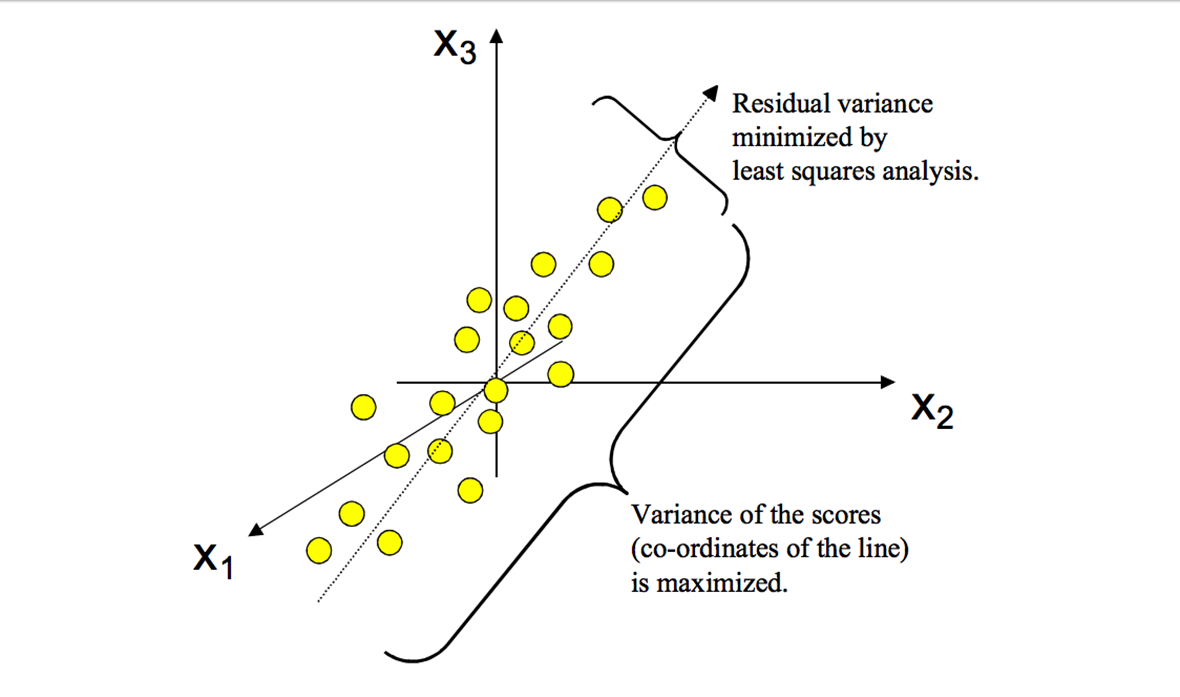

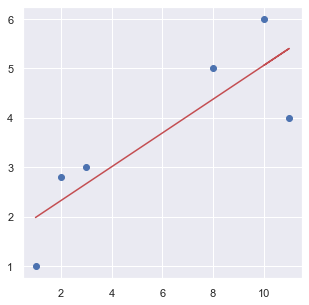

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

data = [[10, 6], [11, 4], [8, 5], [3, 3], [2, 2.8], [1, 1]]
df = pd.DataFrame(data, columns = ['Feature1', 'Feature2'])
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.scatter(df['Feature1'], df['Feature2'])
coeffs = np.polyfit(df['Feature1'], df['Feature2'], 1)
poly = np.poly1d(coeffs)
xs = df['Feature1']
ys = poly(xs)
ax.plot(xs, ys, 'r')
plt.show()

PCA works by first shifting the data so that the center is on top of the origin in the graph. Shifting changes data values, but notice it does not change how the data points are positioned relative to each other.

In [2]:
df['Feature3'] = df['Feature1']-df['Feature1'].mean()
df['Feature4'] = df['Feature2']-df['Feature2'].mean()
df2 = df.drop(['Feature1', 'Feature2'], axis=1)
X = df2.to_numpy()
n = len(X)

In [3]:
df2


,Feature3,Feature4
0,4.166667,2.366667
1,5.166667,0.366667
2,2.166667,1.366667
3,-2.833333,-0.633333
4,-3.833333,-0.833333
5,-4.833333,-2.633333


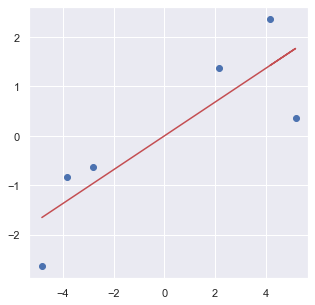

In [4]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.scatter(df2['Feature3'], df2['Feature4'])
coeffs = np.polyfit(df2['Feature3'], df2['Feature4'], 1)
poly = np.poly1d(coeffs)
xs = df2['Feature3']
ys = poly(xs)
ax.plot(xs, ys, 'r')
plt.show()

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

To quantify how good a line fits the data, PCA projects the data onto it and then measures the distances from the data to the line. The algorithm then minimizes those distances (or it can try to find the line that maximizes the distances from the projected points to the origin). Consider that the distances between the data and the line get smaller when the line fits better, but the distances between the data and the origin grow larger when the line fits better.

In [6]:
print(pca.components_)
print(pca.explained_variance_)

[[-0.94171069 -0.33642381]
 [ 0.33642381 -0.94171069]]
[21.28401224  0.80932109]


The algorithm has reprojected the data along two axes. The first axis is called Principal Component 1. The and the second is Principal Component 2.

This two vectors described in the array above are unit vectors. The first consists of -0.94 parts feature 1 and -0.3364 parts feature 2. It is known as the singular vector, or Eigenvector, for principle component 1. The proportions of each feature that make up this vector are known as the loading scores. 


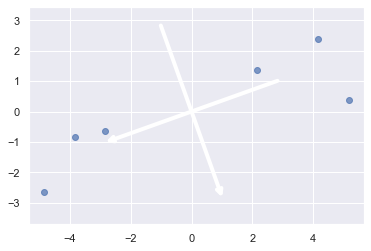

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=4,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 
    draw_vector(pca.mean_ - v, pca.mean_ + v)
plt.axis('equal');

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=5,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

<ipython-input-9-d721d60fb035>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


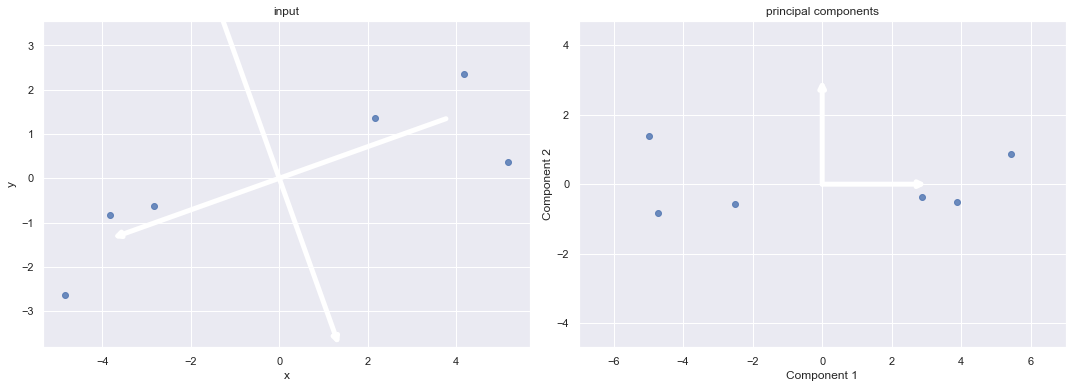

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.8)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 4
    draw_vector(pca.mean_ - v, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
draw_vector([0, 0], [3, 0], ax=ax[1])
draw_vector([0, 0], [0, 3], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='Component 1', ylabel='Component 2',
          title='principal components',
          xlim=(-7, 7), ylim=(-5, 5))

fig.show()

In [10]:
print(pca.components_)
X

[[-0.94171069 -0.33642381]
 [ 0.33642381 -0.94171069]]


array([[ 4.16666667,  2.36666667],
       [ 5.16666667,  0.36666667],
       [ 2.16666667,  1.36666667],
       [-2.83333333, -0.63333333],
       [-3.83333333, -0.83333333],
       [-4.83333333, -2.63333333]])

In [11]:
X_pca

array([[-4.71999755, -0.82694943],
       [-4.98886062,  1.39289575],
       [-2.50015236, -0.55808636],
       [ 2.8812487 , -0.35678402],
       [ 3.89024415, -0.50486569],
       [ 5.43751769,  0.85378974]])

The image above is a visual representation of the principal components algorithm at work. The PCA finds the 'best fitting' line by maximizing the sum of the squared distances from a set of projected points to the origin. 

The principal components algorithm labels the average of the sums of the squared distances for the best fit line the 

Eigenvalue for PC1.
    $$\frac{SS(PC_i Distances)}{n-1} = Eigenvalue_{PC_i}$$

Eigenvalues are just measures of variation. 


In [12]:
print(pca.explained_variance_)

[21.28401224  0.80932109]


Meanwhile the square root of the sums of the squared distances is called the Singular Value for PC1.
    $$\sqrt{SS(PC_i Distances)} = Singular Value_{PC_i}$$

SVD stands for *Singular Value Decomposition*. It is a mathematical technique used in linear algebra and numerical analysis. SVD decomposes a matrix into three other matrices, which can be useful in various applications such as data compression, signal processing, and machine learning.


Given a matrix A, SVD expresses it as the product of three matrices:
 
$$A = U \Sigma V^T$$


- U is an orthogonal matrix ($U x U^T = I$, where I is the identity matrix).
- $\Sigma$ is a diagonal matrix with singular values of A on the diagonal. Singular values are non-negative real numbers.
 
- $V^T$ is the trasnpose of an orthogonal matrix V

PCA is specific application of SVD. When you perform PCA on a dataset, you are essentially performing SVD on the covariance matrix of that dataset.

$$Covariance Matrix = U \Sigma V^T$$

Here, 

- U represents the principal components, 

- $\Sigma$ contains the singular values

- V contains the original features.

SVD has various applications in different fields, such as:

- Dimensionality Reduction: In machine learning, SVD can be used for dimensionality reduction by retaining only the most significant singular values and their corresponding vectors.

- Data Compression: SVD can be used for compressing data by approximating a matrix using only a subset of its singular values and vectors.

SVD is a powerful tool in linear algebra and has a wide range of applications due to its ability to reveal the inherent structure and patterns in data.

In [13]:
# Data matrix X, X doesn't need to be 0-centered
n, m = X.shape
# Compute full SVD
U, Sigma, Vh = np.linalg.svd(X, full_matrices=False, compute_uv=True)
# Transform X with SVD components
X_svd = np.dot(U, np.diag(Sigma))
X_svd

array([[-4.71999755,  0.82694943],
       [-4.98886062, -1.39289575],
       [-2.50015236,  0.55808636],
       [ 2.8812487 ,  0.35678402],
       [ 3.89024415,  0.50486569],
       [ 5.43751769, -0.85378974]])

In [14]:
def generate_principal_components(data):
    # Center the data (subtract the mean of each variable)
    centered_data = data - np.mean(data, axis=0)
    
    # Calculate the covariance matrix
    covariance_matrix = np.cov(centered_data, rowvar=False)
    
    # Perform Singular Value Decomposition (SVD)
    _, _, V = np.linalg.svd(covariance_matrix)
    
    # V contains the principal components as its columns
    principal_components = V.T
    
    return principal_components


# Generate principal components
pcs = generate_principal_components(X)

# Display the principal components
print("Principal Components:")
print(pcs)

Principal Components:
[[-0.94171069 -0.33642381]
 [-0.33642381  0.94171069]]


### Baseball Data Example

In the case of the baseball salary data set, we have 16 variables
describing player abilities and negotiating factors. We can carry out a principal component analysis to investigate whether we can capture most of the variation between player salaries
using a subset of transformed variables (principal components), where each of the transformed variables is a linear combination of all or some of the original player attributes.

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


url = 'https://www4.stat.ncsu.edu/~boos/var.select/baseball.txt' #download this file using wget and load locally
df = pd.read_csv(url)
df.rename(columns={'x1': 'Batting average', 'x2': 'On-base percentage', 'x3': 'Number of runs', 'x4': 'Number of hits', 'x5': 'Number of doubles', 'x6': 'Number of triples', 'x7': 'Number of home runs', 'x8': 'Number of runs batted in', 'x9': 'Number of walks', 'x10': 'Number of strike-outs', 'x11': 'Number of stolen bases', 'x12': 'Number of errors', 'x13': 'FAeligibility', 'x14': 'Indicator of "free agent in 1991/2"', 'x15': 'Indicator of "arbitration eligibility"', 'x16': 'Indicator of "arbitration in 1991/2"', 'y': 'Salary'}, inplace=True)
print(df)

     Salary  Batting average  On-base percentage  Number of runs  \
0      3300            0.272               0.302              69   
1      2600            0.269               0.335              58   
2      2500            0.249               0.337              54   
3      2475            0.260               0.292              59   
4      2313            0.273               0.346              87   
..      ...              ...                 ...             ...   
332     170            0.111               0.138               3   
333     160            0.264               0.318              24   
334     142            0.187               0.281              38   
335     140            0.264               0.270              24   
336     109            0.258               0.395               6   

     Number of hits  Number of doubles  Number of triples  \
0               153                 21                  4   
1               111                 17                  2   


In [16]:
print("Number of null values:", df.isnull().sum())

Number of null values: Salary                                    0
Batting average                           0
On-base percentage                        0
Number of runs                            0
Number of hits                            0
Number of doubles                         0
Number of triples                         0
Number of home runs                       0
Number of runs batted in                  0
Number of walks                           0
Number of strike-outs                     0
Number of stolen bases                    0
Number of errors                          0
FAeligibility                             0
Indicator of "free agent in 1991/2"       0
Indicator of "arbitration eligibility"    0
Indicator of "arbitration in 1991/2"      0
dtype: int64


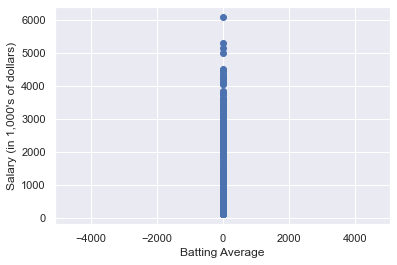

In [17]:
plt.scatter(df['Batting average'], df['Salary'])
plt.xlabel("Batting Average")
plt.ylabel("Salary (in 1,000's of dollars)")
plt.axis('equal');

Batting average is a statistic that measures a player's ability to hit the baseball. One might imagine this is a favorable player attribute and expect a positive relationship to exist between salary and batting average. However, the chart above shows how scale can impact the visual relationship between variables. Batting average has a range from 0 to 1, so by re-scaling the vertical axis to share that same range we can see a better picture of the relationship between the variables.

In [18]:
df['Scaled Salary'] = df['Salary']/df['Salary'].max()

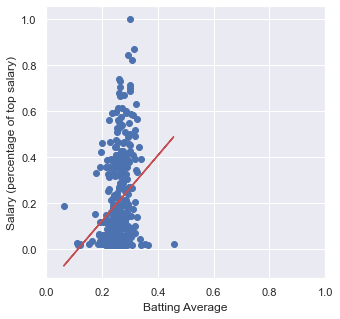

In [19]:
fig=plt.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.scatter(df['Batting average'], df['Scaled Salary'])
m, b = np.polyfit(df['Batting average'], df['Scaled Salary'], 1) #m = slope, b=intercept
ax.plot(df['Batting average'], m*df['Batting average'] + b, 'r')
ax.set_xbound(lower=0.0, upper=1.0)
plt.xlabel("Batting Average")
plt.ylabel("Salary (percentage of top salary)")
plt.show()

Still futher improvement is possible by zooming in:

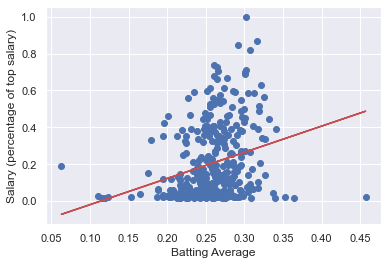

In [20]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(df['Batting average'], df['Scaled Salary'])
m, b = np.polyfit(df['Batting average'], df['Scaled Salary'], 1) #m = slope, b=intercept
ax.plot(df['Batting average'], m*df['Batting average'] + b, 'r')
plt.xlabel("Batting Average")
plt.ylabel("Salary (percentage of top salary)")
plt.show()

But all of this figure drawing is an aside, I want to demonstrate how principal component analysis works. 

In [21]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

df2 = pd.concat([df['Scaled Salary'], df['Batting average']], axis=1)
# normalized the data for PCA
df2_scaled = preprocessing.scale(df.iloc[:,range(1,5)])
df2_pca = df.iloc[:,range(1,5)]
# using sklearn.decomposition.PCA to conduct PCA to the data
pca = PCA()
pca.fit(df2_pca)
#cumsum the explained variance ratio to find how many PCs we should choose
np.cumsum(pca.explained_variance_ratio_)

array([0.97242659, 0.99999921, 0.99999993, 1.        ])

In [22]:
pca = PCA(n_components=1)
pca.fit(df2)
df2_pca = pca.transform(df2)
print("original shape:   ", df2.shape)
print("transformed shape:", df2_pca.shape)

original shape:    (337, 2)
transformed shape: (337, 1)


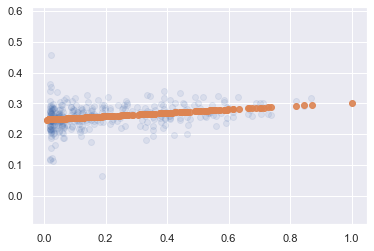

In [23]:
df2_new = pca.inverse_transform(df2_pca)
plt.scatter(df2.iloc[:, 0], df2.iloc[:, 1], alpha=0.1)
plt.scatter(df2_new[:, 0], df2_new[:, 1], alpha=0.9)
plt.axis('equal');

## Step 1: Pre-processing

Pre-processing consists of standardizing or regularizing data prior to applying the PCA algorithm. It can consist of:
* Scaling
* Mean-centering
* Transformation
* Data correction
* Data compression

Variables often have different scales/ranges. A variable with a large range has a large variance, whereas a variable with a small range has a small variance. Since PCA is a maximum variance projection, this would give variables with large ranges more ‘weight’ than a low-variance variable. The first stage in rotating the data is then to standardize the values for each feature by subtracting the mean and dividing by the standard deviation. This moves the centroid of the whole data set to the origin (zero).


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn

### Scale vs. Spread

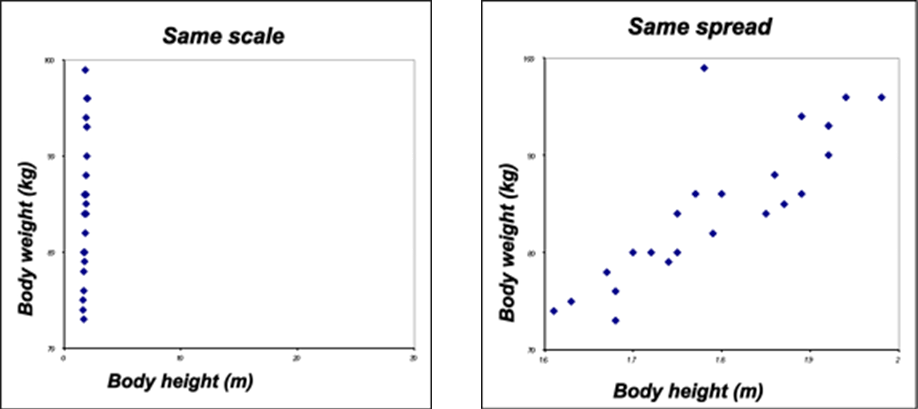

Pretend for a moment that the data plotted above comes from a Canadian high school soccer match. The story goes that the coaches for both teams measured the body weight (in kg, because Canada) of their players. The trainers also record the body height (in m, again because Canada) of each player. 

There are 23 total data points. Notice that when the two variables are scattered with each axis on the same scale – the x and y axes both extend over 30 units – the data points only spread in the vertical direction (left chart). Obviously body weight has a much larger numerical range (Max-Min) than body height. If we were to analyze these data with PCA without any pre-processing, the results would only reflect the variation in body weight!

Observe also that the dataset contains an outlier observation (individual). This would be hard to see without appropriate scaling. Looking at the right graph we see a “zoomed in” view of the data. In this case, it shows us that there is a positive height/weight relationship  among the soccer players. Only one of the 23 observations bucks this trend - somehow the referee of the soccer game made their way into the dataset!

In order to give both variables equal importance in our analysis we must standardize both values. Such standardization is also known as “scaling” or “weighting” and means that the length of each coordinate axis in the variable space is regulated according to a pre-determined criterion.

### Iris Data Example

Remember the iris dataset contains measurements for 150 iris flowers from three different species?

The three classes in the Iris dataset are:

* Iris-setosa (n=50)
* Iris-versicolor (n=50)
* Iris-virginica (n=50)

And the four features of in Iris dataset are:

* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

In [25]:
import pandas as pd

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [26]:
X = df.drop(['class'], axis=1)
X = X.values
y = df['class']
y = y.values


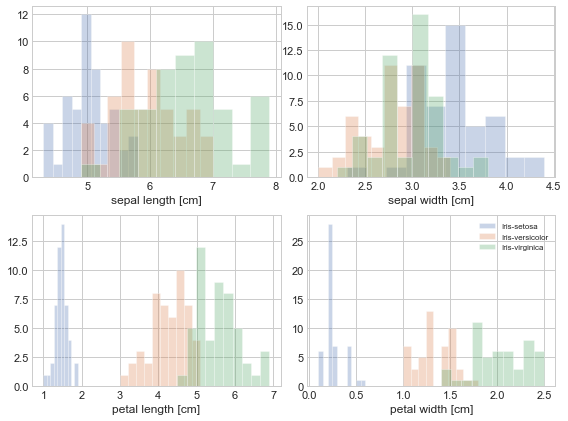

In [27]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

### Unit Variance (mean zero)

PCA is sensitive to scaling. That means that by modifying the variance of the variables, it is possible to attribute different importance to them. 

Scaling makes it possible to down-weight 'noisy' variables while attributing greater weight to variables that provide a good signal. However, this does not mean we ought to be scaling subjectively to achieve a particular model we desire. It is important to approach scaling objectively.  Sometimes no scaling at all would be appropriate, especially with data where all the variables are expressed in the same unit.


Generally, UV-scaling is the most objective approach, and is recommended if there is no prior information about the data. In the mean-centering procedure, we first compute the variable averages. This vector of averages is interpretable as a point (here in red) in space. The point is situated in the middle of the point swarm (at the center of gravity).




In [28]:
X_s = (X - np.mean(X))/np.std(X, ddof=0)


In [29]:
X_std = StandardScaler().fit_transform(X)

In [30]:
X_s

array([[ 0.82894251,  0.01840593, -1.04542332, -1.65332575],
       [ 0.72762544, -0.23488675, -1.04542332, -1.65332575],
       [ 0.62630837, -0.13356967, -1.09608186, -1.65332575],
       [ 0.57564983, -0.18422821, -0.99476479, -1.65332575],
       [ 0.77828398,  0.06906447, -1.04542332, -1.65332575],
       [ 0.98091812,  0.22104008, -0.89344771, -1.55200868],
       [ 0.57564983, -0.0322526 , -1.04542332, -1.60266722],
       [ 0.77828398, -0.0322526 , -0.99476479, -1.65332575],
       [ 0.47433276, -0.28554528, -1.04542332, -1.65332575],
       [ 0.72762544, -0.18422821, -0.99476479, -1.70398429],
       [ 0.98091812,  0.11972301, -0.99476479, -1.65332575],
       [ 0.6769669 , -0.0322526 , -0.94410625, -1.65332575],
       [ 0.6769669 , -0.23488675, -1.04542332, -1.70398429],
       [ 0.42367422, -0.23488675, -1.19739893, -1.70398429],
       [ 1.18355226,  0.27169861, -1.14674039, -1.65332575],
       [ 1.13289373,  0.47433276, -0.99476479, -1.55200868],
       [ 0.98091812,  0.

In [31]:
X_std

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## Step 2: Calculate the Covariance Matrix

The covariance matrix expresses correlation between variables in the dataset. Strongly dependent variables contain redundant information which can be redundant and degrade the overall performance of a statistical model.

A typical approach to PCA involves performing eigendecomposition on the covariance matrix $ \Sigma $, which is a $ d \times d $ matrix with each element representing the covariance between two features:

\begin{equation}
\sigma_{jk} = \frac{1}{n-1} \sum_{i=1}^n (x_{ij} - \bar{x}_{j})(x_{ik} - \bar{x}_k) 
\end{equation}

In matrix notation this is:

\begin{equation}
\sigma = \frac{1}{n-1} (X - \bar{x})^T(X - \bar{x}) 
\end{equation}


In [32]:
x_bar = np.mean(X_std, axis=0)
cov_mat = (X_std - x_bar).T.dot((X_std - x_bar)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


## Step 3: Calculating the Eigenvectors and Eigenvalues

The eigenvectors of a covariance matrix (principal components) will determine the directions of the new features we are creating, while the eigenvalues determine their magnitude. Essentially the eigenvalues will describe the variance of the data along the new axes. These values are generated by performing an eigendecomposition on the covariance matrix:



In [33]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


## Step 4: Computing the Principal Components

Our aim from the outset was to reduce the dimensionality of the original dataset by projecting it onto a smaller subspace with the eigenvectors forming a new set of axes. In order to decide which eigenvector(s) we want to keep and which should be dropped we need to consider the associated eigenvalues. Eigenvectors with low eigenvalues offer the least information about the variation in our dataset. To drop the low [eigen]value eigenvectors we wo;; rank the eigenvalues in decending order.


In [34]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9303537755893183
0.9274036215173421
0.14834222648163972
0.020746013995596023


We can caluclate the “explained variance,” for each eigenvector using the eigenvalues. Explained variance is the amount of information (variance) that can be attributed to each of the principal components. If $e_i$ is the eigenvalue of eigenvector i, then the explained variance of principal component i ($EV_i$) is

\begin{equation}
EV_{i} = \frac{e_i}{\sum_{i=1}^n e_i}
\end{equation}

In [35]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

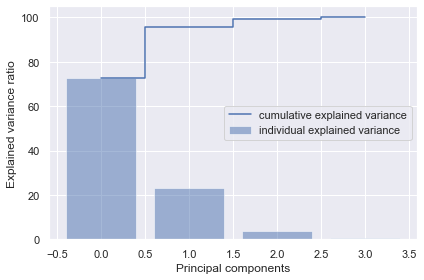

In [36]:
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [37]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [38]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [39]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


A feature vector is a matrix that has as columns the eigenvectors of the components that we decide to keep. This makes it the first step towards dimensionality reduction, because if we choose to keep only p eigenvectors (components) out of n, the final data set will have only p dimensions.

In [40]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [41]:
#A list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# sort eignvalue, eigenvector tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9303537755893183
0.9274036215173421
0.14834222648163972
0.020746013995596023


To gain insights on the variance of the data with respect to a varied number of principal components let’s graph a scree plot. In statistics, a scree plot expresses the variance associated with each principal component.

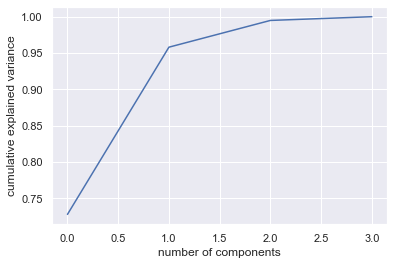

In [42]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

The scree plot clearly indicates that the first two principal components contain almost all of the information (variance) within the data. Note that the initial data set had four features which can be halved without losing much information. Take a look back at the histograms we generated previously to see why this is the case. To confirm your understanding of the screeplot you can generate it yourself using the code below:

In [43]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

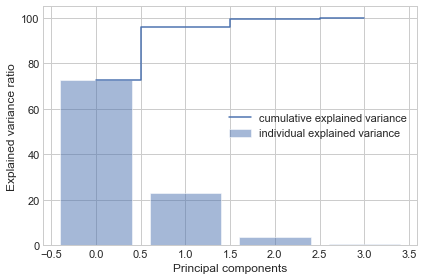

In [44]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

The last step PCA is to re-project the original data along the principal components which represent the most significant variation in the dataset. To do this we simply multiply the transpose of the original data set by the transpose of the obtained feature vector.


In [45]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [46]:
Y = X_std.dot(matrix_w)


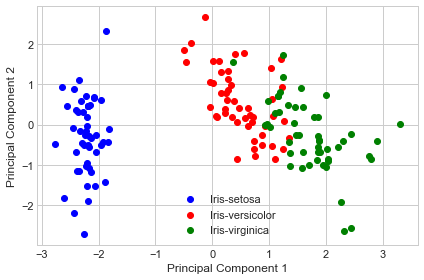

In [47]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [48]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)

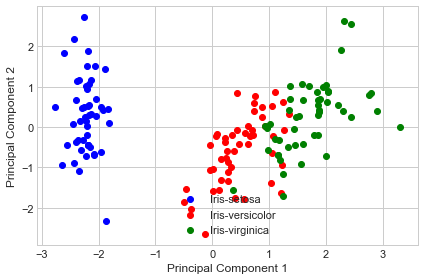

In [49]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

## In-Class Exercise using Wine Data 

In the case of the wine data set, we have 13 chemical
concentrations describing wine samples from three different cultivars.
We can carry out a principal component analysis to investigate
whether we can capture most of the variation between samples
using a smaller number of new variables (principal components),
where each of these new variables is a linear combination of all or
some of the 13 chemical concentrations.

In [50]:
import sklearn.datasets as datasets
    
raw_data = datasets.load_wine()
raw_data

features = pd.DataFrame(data=raw_data['data'],columns=raw_data['feature_names'])
data = features
data['target']=raw_data['target']
data['class']=data['target'].map(lambda ind: raw_data['target_names'][ind])
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


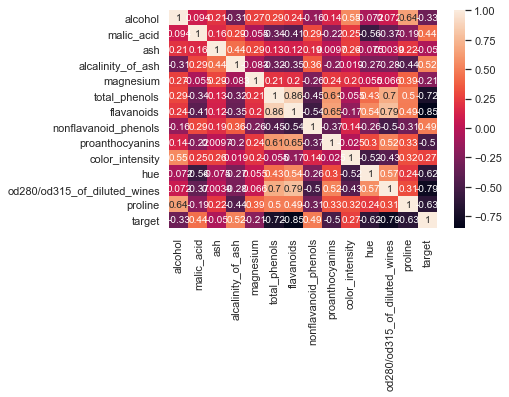

In [51]:
import seaborn as sns
from numpy import cov
from scipy.stats import pearsonr

sns.heatmap(data.corr(), annot=True)
plt.show()

1. Drop the label columns so that we can proceed with PCA

In [52]:
X = data.drop(['class'], axis=1)
X = X.values
y = data['class']
y = y.values

2. Standardize the data

In [53]:
X_std = StandardScaler().fit_transform(X)

3. Calculate the eigenvectors and eigenvalues associated with the standardized data. 

In [54]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

4. Generate a screeplot. Determine how many principal components should be retained and how many should be dropped. Explain your answer and submit it online.

[ 39.54248599  57.3787449   67.70784649  74.33583098  80.60370611
  85.40926568  89.36497253  91.8652166   93.96908761  95.8427026
  97.45590561  98.66159643  99.58705485 100.        ]


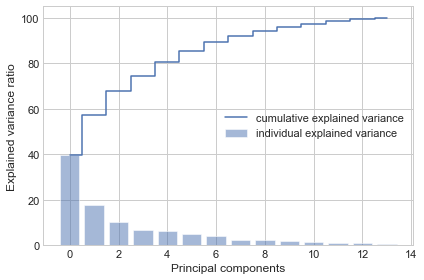

In [55]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(14), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(14), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

# You would probably use either 12 or 13 components because after that it stops explaining a considerable amount more

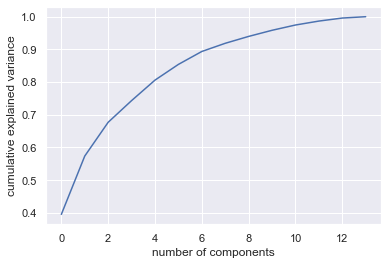

In [56]:
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

5. Reproject the data. Report the principal component values for the first observation in your dataset.

In [57]:
#A list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# sort eignvalue, eigenvector tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

matrix_w = np.hstack((eig_pairs[0][1].reshape(14,1),
                      eig_pairs[1][1].reshape(14,1)))

print('Matrix W:\n', matrix_w)
Y = X_std.dot(matrix_w)

Matrix W:
 [[-0.13632501 -0.48416087]
 [ 0.22267638 -0.22359095]
 [-0.00225793 -0.31585588]
 [ 0.22429849  0.01161574]
 [-0.12463016 -0.30055143]
 [-0.35926404 -0.06711983]
 [-0.39071171  0.00131345]
 [ 0.2670012  -0.0269887 ]
 [-0.2790625  -0.04122256]
 [ 0.08931829 -0.52978274]
 [-0.27682265  0.27790735]
 [-0.35052618  0.16277625]
 [-0.26951525 -0.36605886]
 [ 0.39366953 -0.00569041]]


In [66]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=12)
Y_sklearn = sklearn_pca.fit_transform(X_std)

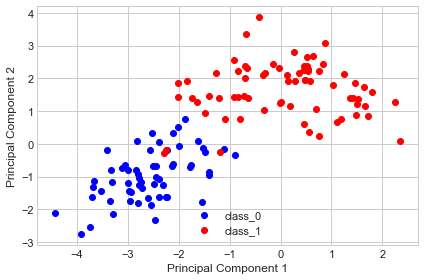

In [65]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('class_0', 'class_1'),
                        ('blue', 'red')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()